In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add, concatenate
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np 
from random import random
import time
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import keras.backend as K
import pickle
from keras.initializers import RandomUniform, TruncatedNormal

In [2]:
with open("/content/concatenated_matrix_with_passive.pickle", "rb") as pickle_file:
    content = pickle.load(pickle_file)


FileNotFoundError: [Errno 2] No such file or directory: '/content/concatenated_matrix_with_passive.pickle'

In [63]:
y = content[:,-1]
x = content[:,:-1]

In [64]:
y = np.asanyarray(y)
x =  np.asanyarray(x)
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.4, random_state=23)


In [21]:
np.shape(y)

(17000,)

In [68]:
input1 = Input(shape=(31,))
x  = Dense(300, kernel_initializer = RandomUniform(),bias_initializer = TruncatedNormal(), activation='relu')(input1)
x  = Dense(150, kernel_initializer = RandomUniform(),bias_initializer = TruncatedNormal(), activation='relu')(x)
x  = Dense(50, kernel_initializer = RandomUniform(),bias_initializer = TruncatedNormal(), activation='sigmoid')(x)


out= tf.keras.layers.Dense(1, kernel_initializer = RandomUniform(), bias_initializer = TruncatedNormal(), activation='relu')(x)

model = tf.keras.models.Model(inputs=input1, outputs=out)

In [69]:
Adam = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=["accuracy"]) 
print('model complied')


model complied


In [70]:
history=model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=100, batch_size=128,verbose=1, shuffle= True)

Epoch 1/100
80/80 [==============================] - 1s 7ms/step - loss: 0.6099 - accuracy: 0.7333 - val_loss: 0.5803 - val_accuracy: 0.7224
Epoch 2/100
80/80 [==============================] - 0s 5ms/step - loss: 0.5449 - accuracy: 0.7333 - val_loss: 0.5147 - val_accuracy: 0.7225
Epoch 3/100
80/80 [==============================] - 0s 5ms/step - loss: 0.4405 - accuracy: 0.7575 - val_loss: 0.3628 - val_accuracy: 0.7918
Epoch 4/100
80/80 [==============================] - 0s 5ms/step - loss: 0.3113 - accuracy: 0.8406 - val_loss: 0.2774 - val_accuracy: 0.8650
Epoch 5/100
80/80 [==============================] - 0s 5ms/step - loss: 0.2545 - accuracy: 0.8811 - val_loss: 0.2362 - val_accuracy: 0.8938
Epoch 6/100
80/80 [==============================] - 0s 5ms/step - loss: 0.2228 - accuracy: 0.8932 - val_loss: 0.2148 - val_accuracy: 0.8951
Epoch 7/100
80/80 [==============================] - 0s 6ms/step - loss: 0.2083 - accuracy: 0.8936 - val_loss: 0.2136 - val_accuracy: 0.8990
Epoch 8/100
8

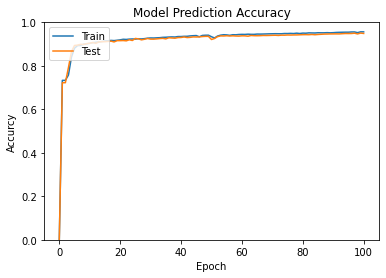

In [72]:
from matplotlib import pyplot as plt
fig1= plt.gcf()
acc1 = history .history['accuracy']
acc1.insert(0 , 0)
val_acc1 = history.history['val_accuracy']
val_acc1.insert(0 , 0)
plt.plot(acc1)
plt.plot(val_acc1)
plt.title('Model Prediction Accuracy')
plt.ylabel('Accurcy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.ylim(0,1)
plt.show()
fig1.savefig("feedforward_accuracy.pdf")